# MLB Wins and Loses Model

In [3]:
%matplotlib inline

In [4]:
from pylab import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from mpl_toolkits.mplot3d import Axes3D

In [5]:
#Datasets
team_reg_bat = pd.DataFrame.from_csv('data/team.csv', index_col = None, encoding = ('utf-8'))

In [6]:
team_reg_bat.columns

Index(['year', 'league_id', 'team_id', 'franchise_id', 'div_id', 'rank', 'g',
       'ghome', 'w', 'l', 'div_win', 'wc_win', 'lg_win', 'ws_win', 'r', 'ab',
       'h', 'double', 'triple', 'hr', 'bb', 'so', 'sb', 'cs', 'hbp', 'sf',
       'ra', 'er', 'era', 'cg', 'sho', 'sv', 'ipouts', 'ha', 'hra', 'bba',
       'soa', 'e', 'dp', 'fp', 'name', 'park', 'attendance', 'bpf', 'ppf',
       'team_id_br', 'team_id_lahman45', 'team_id_retro'],
      dtype='object')

In [7]:
team_rb = team_reg_bat.loc[team_reg_bat['year'] >= 2005, :]

In [8]:
####### Team Column Labeling #######

#Team Regular Season Batting
team_reg_bat = team_reg_bat.fillna(0)
tr_ab = team_rb['ab']
tr_bb = team_rb['bb']
tr_hbp = team_rb['hbp']
tr_sf = team_rb['sf']
tr_h = team_rb['h']
tr_dou = team_rb['double']
tr_tri = team_rb['triple']
tr_hr = team_rb['hr']
tr_sin = tr_h - (tr_dou + tr_tri + tr_hr)
trb_teamid = team_rb['team_id']
tr_bso = team_rb['so'].dropna()
tr_sb = team_rb['sb']

In [9]:
####### Team Batting Statistic Calculations #######

#Batting Average
team_rb['bat_avg'] = tr_h/tr_ab
tr_avg = team_rb['bat_avg']
#Slugging Percentage
team_rb['slg'] = (tr_sin + 2*tr_dou + 3*tr_tri + 4*tr_hr)/tr_ab
tr_slg = team_rb['slg']
#On Base Percentage
team_rb['obp'] = (tr_h + tr_bb + tr_hbp)/(tr_ab + tr_bb + tr_hbp + tr_sf)
tr_obp = team_rb['obp']
#On Base PLus Slugging
team_rb['ops'] = tr_slg + tr_obp
tr_ops = team_rb['ops']
#Weighted On Base Average
team_rb['woba'] = (.69*tr_bb + .72*tr_hbp + .89*tr_sin + 1.27*tr_dou + 1.62*tr_tri + 2.10*tr_hr)/(tr_ab + tr_bb + tr_sf + tr_hbp)
tr_woba = team_rb['woba']
#Strikeout Percentage
team_rb['kperc'] = tr_bso / (tr_ab + tr_bb + tr_hbp + tr_sf)
tr_kperc = team_rb['kperc']

In [10]:
# Delete Outliers in Stats
team_rb_h = team_rb.loc[((team_rb.h >= np.mean(tr_h)-3*np.std(tr_h)) & (team_rb.h <= np.mean(tr_h)+3*np.std(tr_h))), :]
team_rb_d = team_rb.loc[((team_rb.double >= np.mean(tr_dou)-3*np.std(tr_dou)) & (team_rb.double <= np.mean(tr_dou)+3*np.std(tr_dou))), :]
team_rb_t = team_rb.loc[((team_rb.triple >= np.mean(tr_tri)-3*np.std(tr_tri)) & (team_rb.triple <= np.mean(tr_tri)+3*np.std(tr_tri))), :]
team_rb_hr = team_rb.loc[((team_rb.hr >= np.mean(tr_hr)-3*np.std(tr_hr)) & (team_rb.hr <= np.mean(tr_hr)+3*np.std(tr_hr))), :]
team_rb_so = team_rb.loc[((team_rb.so >= np.mean(tr_bso)-3*np.std(tr_bso)) & (team_rb.so <= np.mean(tr_bso)+3*np.std(tr_bso))), :]
team_rb_bb = team_rb.loc[((team_rb.bb >= np.mean(tr_bb)-3*np.std(tr_bb)) & (team_rb.bb <= np.mean(tr_bb)+3*np.std(tr_bb))), :]
team_rb_h = team_rb.loc[((team_rb.h >= np.mean(tr_h)-3*np.std(tr_h)) & (team_rb.h <= np.mean(tr_h)+3*np.std(tr_h))), :]

In [11]:
# Deleting outliers in calculated stats
team_rb_avg = team_rb.loc[((team_rb.bat_avg >= np.mean(tr_avg)-3*np.std(tr_avg)) & (team_rb.bat_avg <= np.mean(tr_avg)+3*np.std(tr_avg))), :]
team_rb_slg = team_rb.loc[((team_rb.slg >= np.mean(tr_slg)-3*np.std(tr_slg)) & (team_rb.slg <= np.mean(tr_slg)+3*np.std(tr_slg))), :]
team_rb_obp = team_rb.loc[((team_rb.obp >= np.mean(tr_obp)-3*np.std(tr_obp)) & (team_rb.obp <= np.mean(tr_obp)+3*np.std(tr_obp))), :]
team_rb_ops = team_rb.loc[((team_rb.ops >= np.mean(tr_ops)-3*np.std(tr_ops)) & (team_rb.ops <= np.mean(tr_ops)+3*np.std(tr_ops))), :]
team_rb_woba = team_rb.loc[((team_rb.woba >= np.mean(tr_woba)-3*np.std(tr_woba)) & (team_rb.woba <= np.mean(tr_woba)+3*np.std(tr_woba))), :]
team_rb_kperc = team_rb.loc[((team_rb.kperc >= np.mean(tr_kperc)-3*np.std(tr_kperc)) & (team_rb.kperc <= np.mean(tr_kperc)+3*np.std(tr_kperc))), :]

In [12]:
fig = plt.figure()

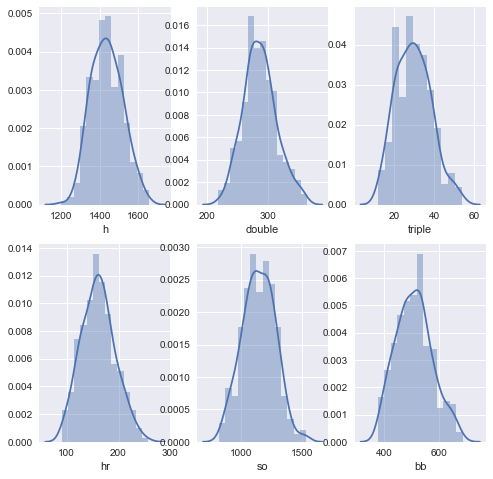

In [13]:
####### DISTRIBUTION PLOTS FOR TEAM OFFENSIVE STATS #######

fig, ax = plt.subplots(2,3,figsize=(8,8))

sns.distplot(team_rb_h.h, ax=ax[0,0])
sns.distplot(team_rb_d.double, ax=ax[0,1])
sns.distplot(team_rb_t.triple, ax=ax[0,2])
sns.distplot(team_rb_hr.hr, ax=ax[1,0])
sns.distplot(team_rb_so.so, ax=ax[1,1])
sns.distplot(team_rb_bb.bb, ax=ax[1,2])
None

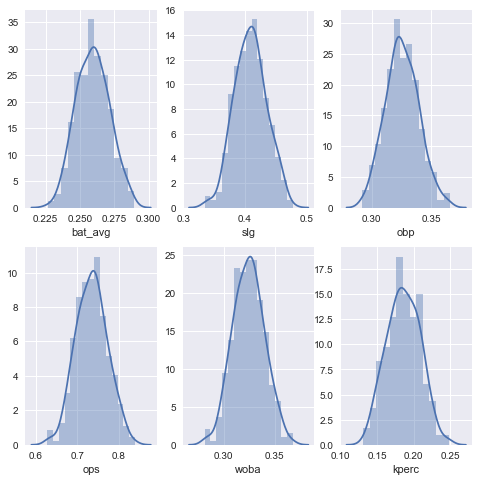

In [14]:
####### DISTRIBUTION PLOTS FOR TEAM CALCULATED OFFENSIVE STATS #######

fig, ax = plt.subplots(2,3,figsize=(8,8))

sns.distplot(team_rb_avg.bat_avg, ax=ax[0,0])
sns.distplot(team_rb_slg.slg, ax=ax[0,1])
sns.distplot(team_rb_obp.obp, ax=ax[0,2])
sns.distplot(team_rb_ops.ops, ax=ax[1,0])
sns.distplot(team_rb_woba.woba, ax=ax[1,1])
sns.distplot(team_rb_kperc.kperc, ax=ax[1,2])
None

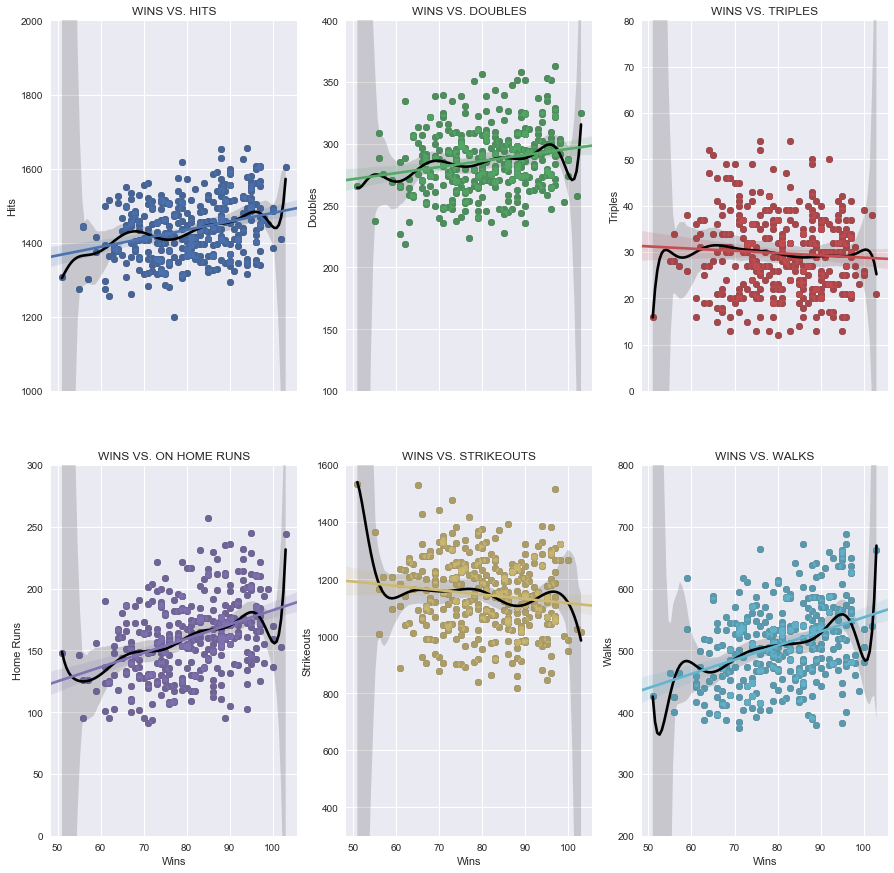

In [15]:
####### REGULAR SEASON STATS TO WINS #######

fig, ax = plt.subplots(2,3,figsize=(15,15), sharex = True)

# Hits Scatter
sns.regplot(x='w', y='h', data=team_rb_h, ax=ax[0,0], order=10, truncate=True, color='black')
sns.regplot(x='w', y='h', data=team_rb_h, ax=ax[0,0])
ax[0,0].set_title('WINS VS. HITS')
ax[0,0].set_ylabel('Hits')
ax[0,0].set_xlabel('')
ax[0,0].set_ylim([1000,2000])
h_slope, h_intercept, h_r_value, h_p_value, h_slope_std_error = scipy.stats.linregress(team_rb_h.w, team_rb_h.h)

# Doubles Scatter
sns.regplot(x='w', y='double', data=team_rb_d, ax=ax[0,1], order=10, truncate=True, color='black')
sns.regplot(x='w', y='double', data=team_rb_d, ax=ax[0,1])
ax[0,1].set_title('WINS VS. DOUBLES')
ax[0,1].set_ylabel('Doubles')
ax[0,1].set_xlabel('')
ax[0,1].set_ylim([100,400])
d_slope, d_intercept, d_r_value, d_p_value, d_slope_std_error = scipy.stats.linregress(team_rb_d.w, team_rb_d.double)

# Triples Scatter
sns.regplot(x='w', y='triple', data=team_rb_t, ax=ax[0,2], order=10, truncate=True, color='black')
sns.regplot(x='w', y='triple', data=team_rb_t, ax=ax[0,2])
ax[0,2].set_title('WINS VS. TRIPLES')
ax[0,2].set_ylabel('Triples')
ax[0,2].set_xlabel('')
ax[0,2].set_ylim([0,80])
t_slope, t_intercept, t_r_value, t_p_value, t_slope_std_error = scipy.stats.linregress(team_rb_t.w, team_rb_t.triple)

# Home Runs Scatter
sns.regplot(x='w', y='hr', data=team_rb_hr, ax=ax[1,0], order=10, truncate=True, color='black')
sns.regplot(x='w', y='hr', data=team_rb_hr, ax=ax[1,0])
ax[1,0].set_title('WINS VS. ON HOME RUNS')
ax[1,0].set_ylabel('Home Runs')
ax[1,0].set_xlabel('Wins')
ax[1,0].set_ylim([0,300])
hr_slope, hr_intercept, hr_r_value, hr_p_value, hr_slope_std_error = scipy.stats.linregress(team_rb_hr.w, team_rb_hr.hr)

# Strikeouts Scatter
sns.regplot(x='w', y='so', data=team_rb_so, ax=ax[1,1], order=10, truncate=True, color='black')
sns.regplot(x='w', y='so', data=team_rb_so, ax=ax[1,1])
ax[1,1].set_title('WINS VS. STRIKEOUTS')
ax[1,1].set_ylabel('Strikeouts')
ax[1,1].set_xlabel('Wins')
ax[1,1].set_ylim([300,1600])
so_slope, so_intercept, so_r_value, so_p_value, so_slope_std_error = scipy.stats.linregress(team_rb_so.w, team_rb_so.so)

# Walks Scatter
sns.regplot(x='w', y='bb', data=team_rb_bb, ax=ax[1,2], order=10, truncate=True, color='black')
sns.regplot(x='w', y='bb', data=team_rb_bb, ax=ax[1,2])
ax[1,2].set_title('WINS VS. WALKS')
ax[1,2].set_ylabel('Walks')
ax[1,2].set_xlabel('Wins')
ax[1,2].set_ylim([200,800])
bb_slope, bb_intercept, bb_r_value, bb_p_value, bb_slope_std_error = scipy.stats.linregress(team_rb_bb.w, team_rb_bb.bb)

In [16]:
print('HITS REGRESSION')
print('Slope:', h_slope)
print('Intercept:', h_intercept)
print('R value:', h_r_value)
print('P value:', h_p_value)
print('Slope Standard Deviation Error:', h_slope_std_error)
print('')
print('DOUBLES REGRESSION')
print('Slope:', d_slope)
print('Intercept:', d_intercept)
print('R value:', d_r_value)
print('P value:', d_p_value)
print('Slope Standard Deviation Error:', d_slope_std_error)
print('')
print('TRIPLES REGRESSION')
print('Slope:', t_slope)
print('Intercept:', t_intercept)
print('R value:', t_r_value)
print('P value:', t_p_value)
print('Slope Standard Deviation Error:', t_slope_std_error)
print('')
print('HOME RUNS REGRESSION')
print('Slope:', hr_slope)
print('Intercept:', hr_intercept)
print('R value:', hr_r_value)
print('P value:', hr_p_value)
print('Slope Standard Deviation Error:', hr_slope_std_error)
print('')
print('STRIKEOUTS REGRESSION')
print('Slope:', so_slope)
print('Intercept:', so_intercept)
print('R value:', so_r_value)
print('P value:', so_p_value)
print('Slope Standard Deviation Error:', so_slope_std_error)
print('')
print('WALKS REGRESSION')
print('Slope:', bb_slope)
print('Intercept:', bb_intercept)
print('R value:', bb_r_value)
print('P value:', bb_p_value)
print('Slope Standard Deviation Error:', bb_slope_std_error)
print('')
None

HITS REGRESSION
Slope: 2.29180058572
Intercept: 1251.40013862
R value: 0.300864371817
P value: 2.4835973382e-08
Slope Standard Deviation Error: 0.401112197992

DOUBLES REGRESSION
Slope: 0.488795815086
Intercept: 247.08683623
R value: 0.194401951701
P value: 0.000390228499565
Slope Standard Deviation Error: 0.13639154118

TRIPLES REGRESSION
Slope: -0.0483731452957
Intercept: 33.6373937252
R value: -0.0592193841301
P value: 0.284910678263
Slope Standard Deviation Error: 0.0451615439105

HOME RUNS REGRESSION
Slope: 1.15073142949
Intercept: 67.5085375894
R value: 0.38459057279
P value: 4.8575574351e-13
Slope Standard Deviation Error: 0.152736987904

STRIKEOUTS REGRESSION
Slope: -1.5169484744
Intercept: 1267.64691477
R value: -0.121322348958
P value: 0.0275445031153
Slope Standard Deviation Error: 0.685287999497

WALKS REGRESSION
Slope: 2.28469553687
Intercept: 325.045279958
R value: 0.365999687987
P value: 6.73959262465e-12
Slope Standard Deviation Error: 0.320760389499



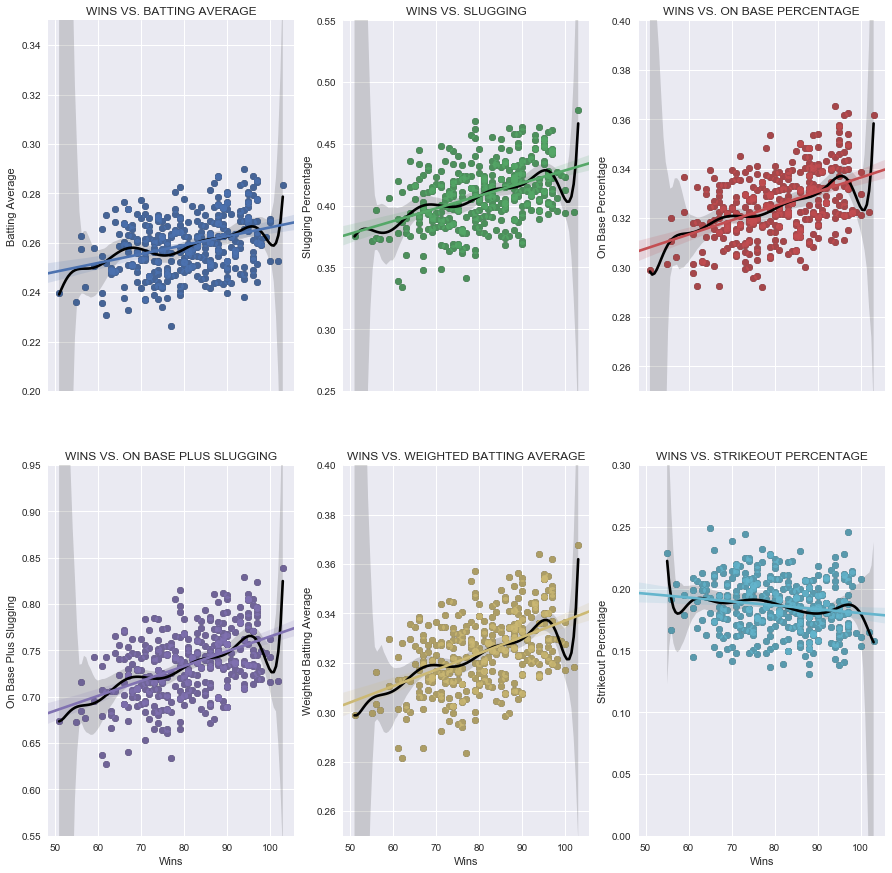

In [17]:
####### REGULAR SEASON CALCUALTED STATS TO WINS #######

fig, ax = plt.subplots(2,3,figsize=(15,15), sharex = True)

sns.regplot(x='w', y='bat_avg', data=team_rb_avg, ax=ax[0,0], order=10, truncate=True, color='black')
sns.regplot(x='w', y='bat_avg', data=team_rb_avg, ax=ax[0,0])
ax[0,0].set_title('WINS VS. BATTING AVERAGE')
ax[0,0].set_ylabel('Batting Average')
ax[0,0].set_xlabel('')
ax[0,0].set_ylim([.2,.35])
avg_slope, avg_intercept, avg_r_value, avg_p_value, avg_slope_std_error = scipy.stats.linregress(team_rb_avg.w, team_rb_avg.bat_avg)

sns.regplot(x='w', y='slg', data=team_rb_slg, ax=ax[0,1], order=10, truncate=True, color='black')
sns.regplot(x='w', y='slg', data=team_rb_slg, ax=ax[0,1])
ax[0,1].set_title('WINS VS. SLUGGING')
ax[0,1].set_ylabel('Slugging Percentage')
ax[0,1].set_xlabel('')
ax[0,1].set_ylim([.25,.55])
slg_slope, slg_intercept, slg_r_value, slg_p_value, slg_slope_std_error = scipy.stats.linregress(team_rb_slg.w, team_rb_slg.slg)

sns.regplot(x='w', y='obp', data=team_rb_obp, ax=ax[0,2], order=10, truncate=True, color='black')
sns.regplot(x='w', y='obp', data=team_rb_obp, ax=ax[0,2])
ax[0,2].set_title('WINS VS. ON BASE PERCENTAGE')
ax[0,2].set_ylabel('On Base Percentage')
ax[0,2].set_xlabel('')
ax[0,2].set_ylim([.25,.4])
obp_slope, obp_intercept, obp_r_value, obp_p_value, obp_slope_std_error = scipy.stats.linregress(team_rb_obp.w, team_rb_obp.obp)

sns.regplot(x='w', y='ops', data=team_rb_ops, ax=ax[1,0], order=10, truncate=True, color='black')
sns.regplot(x='w', y='ops', data=team_rb_ops, ax=ax[1,0])
ax[1,0].set_title('WINS VS. ON BASE PLUS SLUGGING')
ax[1,0].set_ylabel('On Base Plus Slugging')
ax[1,0].set_xlabel('Wins')
ax[1,0].set_ylim([.55,.95])
ops_slope, ops_intercept, ops_r_value, ops_p_value, ops_slope_std_error = scipy.stats.linregress(team_rb_ops.w, team_rb_ops.ops)

sns.regplot(x='w', y='woba', data=team_rb_woba, ax=ax[1,1], order=10, truncate=True, color='black')
sns.regplot(x='w', y='woba', data=team_rb_woba, ax=ax[1,1])
ax[1,1].set_title('WINS VS. WEIGHTED BATTING AVERAGE')
ax[1,1].set_ylabel('Weighted Batting Average')
ax[1,1].set_xlabel('Wins')
ax[1,1].set_ylim([.25,.4])
woba_slope, woba_intercept, woba_r_value, woba_p_value, woba_slope_std_error = scipy.stats.linregress(team_rb_woba.w, team_rb_woba.woba)

sns.regplot(x='w', y='kperc', data=team_rb_kperc, ax=ax[1,2], order=10, truncate=True, color='black')
sns.regplot(x='w', y='kperc', data=team_rb_kperc, ax=ax[1,2])
ax[1,2].set_title('WINS VS. STRIKEOUT PERCENTAGE')
ax[1,2].set_ylabel('Strikeout Percentage')
ax[1,2].set_xlabel('Wins')
ax[1,2].set_ylim([0,.3])
kperc_slope, kperc_intercept, kperc_r_value, kperc_p_value, kperc_slope_std_error = scipy.stats.linregress(team_rb_kperc.w, team_rb_kperc.kperc)
None

In [18]:
print('BATTING AVERAGE REGRESSION')
print('Slope:', avg_slope)
print('Intercept:', avg_intercept)
print('R value:', avg_r_value)
print('P value:', avg_p_value)
print('Slope Standard Deviation Error:', avg_slope_std_error)
print('')
print('SLUGGING REGRESSION')
print('Slope:', slg_slope)
print('Intercept:', slg_intercept)
print('R value:', slg_r_value)
print('P value:', slg_p_value)
print('Slope Standard Deviation Error:', slg_slope_std_error)
print('')
print('ON BASE REGRESSION')
print('Slope:', obp_slope)
print('Intercept:', obp_intercept)
print('R value:', obp_r_value)
print('P value:', obp_p_value)
print('Slope Standard Deviation Error:', obp_slope_std_error)
print('')
print('ON BASE PLUS SLUG REGRESSION')
print('Slope:', ops_slope)
print('Intercept:', ops_intercept)
print('R value:', ops_r_value)
print('P value:', ops_p_value)
print('Slope Standard Deviation Error:', ops_slope_std_error)
print('')
print('WIEGHTED ON BASE REGRESSION')
print('Slope:', woba_slope)
print('Intercept:', woba_intercept)
print('R value:', woba_r_value)
print('P value:', woba_p_value)
print('Slope Standard Deviation Error:', woba_slope_std_error)
print('')
print('K PERCENTAGE REGRESSION')
print('Slope:', kperc_slope)
print('Intercept:', kperc_intercept)
print('R value:', kperc_r_value)
print('P value:', kperc_p_value)
print('Slope Standard Deviation Error:', kperc_slope_std_error)
print('')
None

BATTING AVERAGE REGRESSION
Slope: 0.000359926258328
Intercept: 0.230220350913
R value: 0.322392241642
P value: 2.03300459357e-09
Slope Standard Deviation Error: 5.83527541811e-05

SLUGGING REGRESSION
Slope: 0.00102625135313
Intercept: 0.32600433518
R value: 0.426777084695
P value: 4.86647821195e-16
Slope Standard Deviation Error: 0.000120075820522

ON BASE REGRESSION
Slope: 0.000576081326309
Intercept: 0.278805526867
R value: 0.444918592419
P value: 1.90117786949e-17
Slope Standard Deviation Error: 6.40274714983e-05

ON BASE PLUS SLUG REGRESSION
Slope: 0.00160233267944
Intercept: 0.604809862047
R value: 0.458573631574
P value: 1.45266692588e-18
Slope Standard Deviation Error: 0.00017145121614

WIEGHTED ON BASE REGRESSION
Slope: 0.000662159523579
Intercept: 0.270884914027
R value: 0.46586397179
P value: 3.50797693938e-19
Slope Standard Deviation Error: 6.94447397391e-05

K PERCENTAGE REGRESSION
Slope: -0.000314879242441
Intercept: 0.211729043258
R value: -0.147900858856
P value: 0.00720

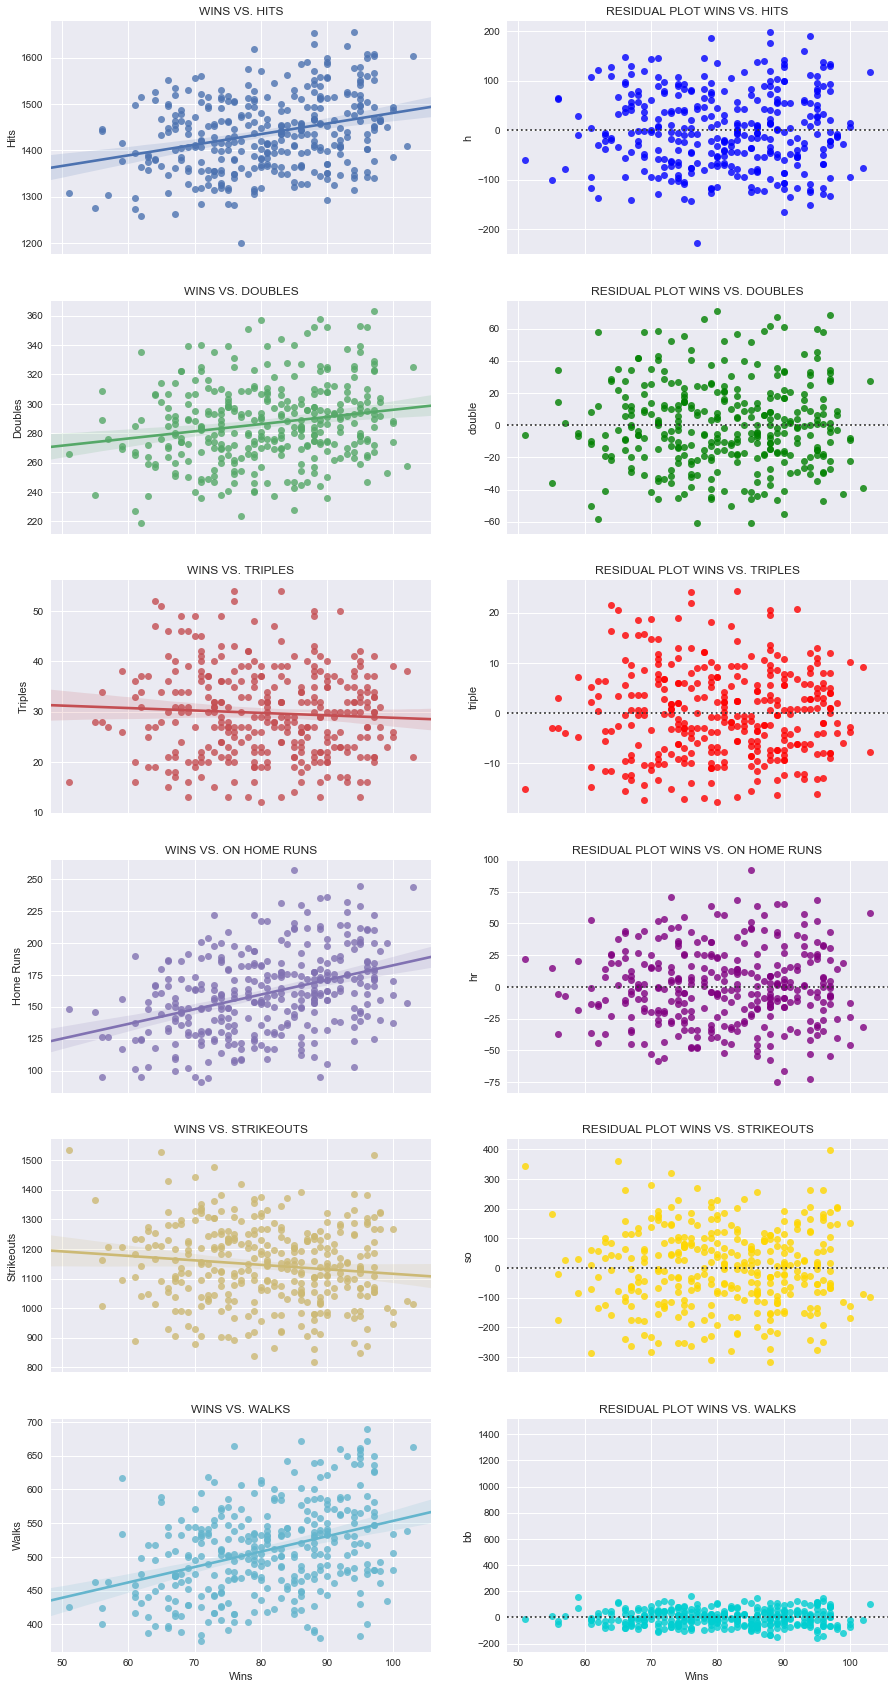

In [19]:
fig, ax = plt.subplots(6,2,figsize=(15,30), sharex = True)

sns.regplot(x='w', y='h', data=team_rb_h, ax=ax[0,0])
ax[0,0].set_title('WINS VS. HITS')
ax[0,0].set_ylabel('Hits')
ax[0,0].set_xlabel('')

sns.residplot(x='w', y='h', data=team_rb_h, ax=ax[0,1], color = 'blue')
ax[0,1].set_title('RESIDUAL PLOT WINS VS. HITS')
ax[0,1].set_xlabel('')

sns.regplot(x='w', y='double', data=team_rb_d, ax=ax[1,0])
ax[1,0].set_title('WINS VS. DOUBLES')
ax[1,0].set_ylabel('Doubles')
ax[1,0].set_xlabel('')

sns.residplot(x='w', y='double', data=team_rb_d, ax=ax[1,1], color = 'green')
ax[1,1].set_title('RESIDUAL PLOT WINS VS. DOUBLES')
ax[1,1].set_xlabel('')

sns.regplot(x='w', y='triple', data=team_rb_t, ax=ax[2,0])
ax[2,0].set_title('WINS VS. TRIPLES')
ax[2,0].set_ylabel('Triples')
ax[2,0].set_xlabel('')

sns.residplot(x='w', y='triple', data=team_rb_t, ax=ax[2,1], color = 'red')
ax[2,1].set_title('RESIDUAL PLOT WINS VS. TRIPLES')
ax[2,1].set_xlabel('')

sns.regplot(x='w', y='hr', data=team_rb_hr, ax=ax[3,0])
ax[3,0].set_title('WINS VS. ON HOME RUNS')
ax[3,0].set_ylabel('Home Runs')
ax[3,0].set_xlabel('')

sns.residplot(x='w', y='hr', data=team_rb_hr, ax=ax[3,1], color = 'purple')
ax[3,1].set_title('RESIDUAL PLOT WINS VS. ON HOME RUNS')
ax[3,1].set_xlabel('')

sns.regplot(x='w', y='so', data=team_rb_so, ax=ax[4,0])
ax[4,0].set_title('WINS VS. STRIKEOUTS')
ax[4,0].set_ylabel('Strikeouts')
ax[4,0].set_xlabel('')

sns.residplot(x='w', y='so', data=team_rb_so, ax=ax[4,1], color = 'gold')
ax[4,1].set_title('RESIDUAL PLOT WINS VS. STRIKEOUTS')
ax[4,1].set_xlabel('')

sns.regplot(x='w', y='bb', data=team_rb_bb, ax=ax[5,0])
ax[5,0].set_title('WINS VS. WALKS')
ax[5,0].set_ylabel('Walks')
ax[5,0].set_xlabel('Wins')

sns.residplot(x='w', y='bb', data=team_rb_bb, ax=ax[5,1], color = 'darkturquoise')
ax[5,1].set_title('RESIDUAL PLOT WINS VS. WALKS')
ax[5,1].set_xlabel('Wins')
None

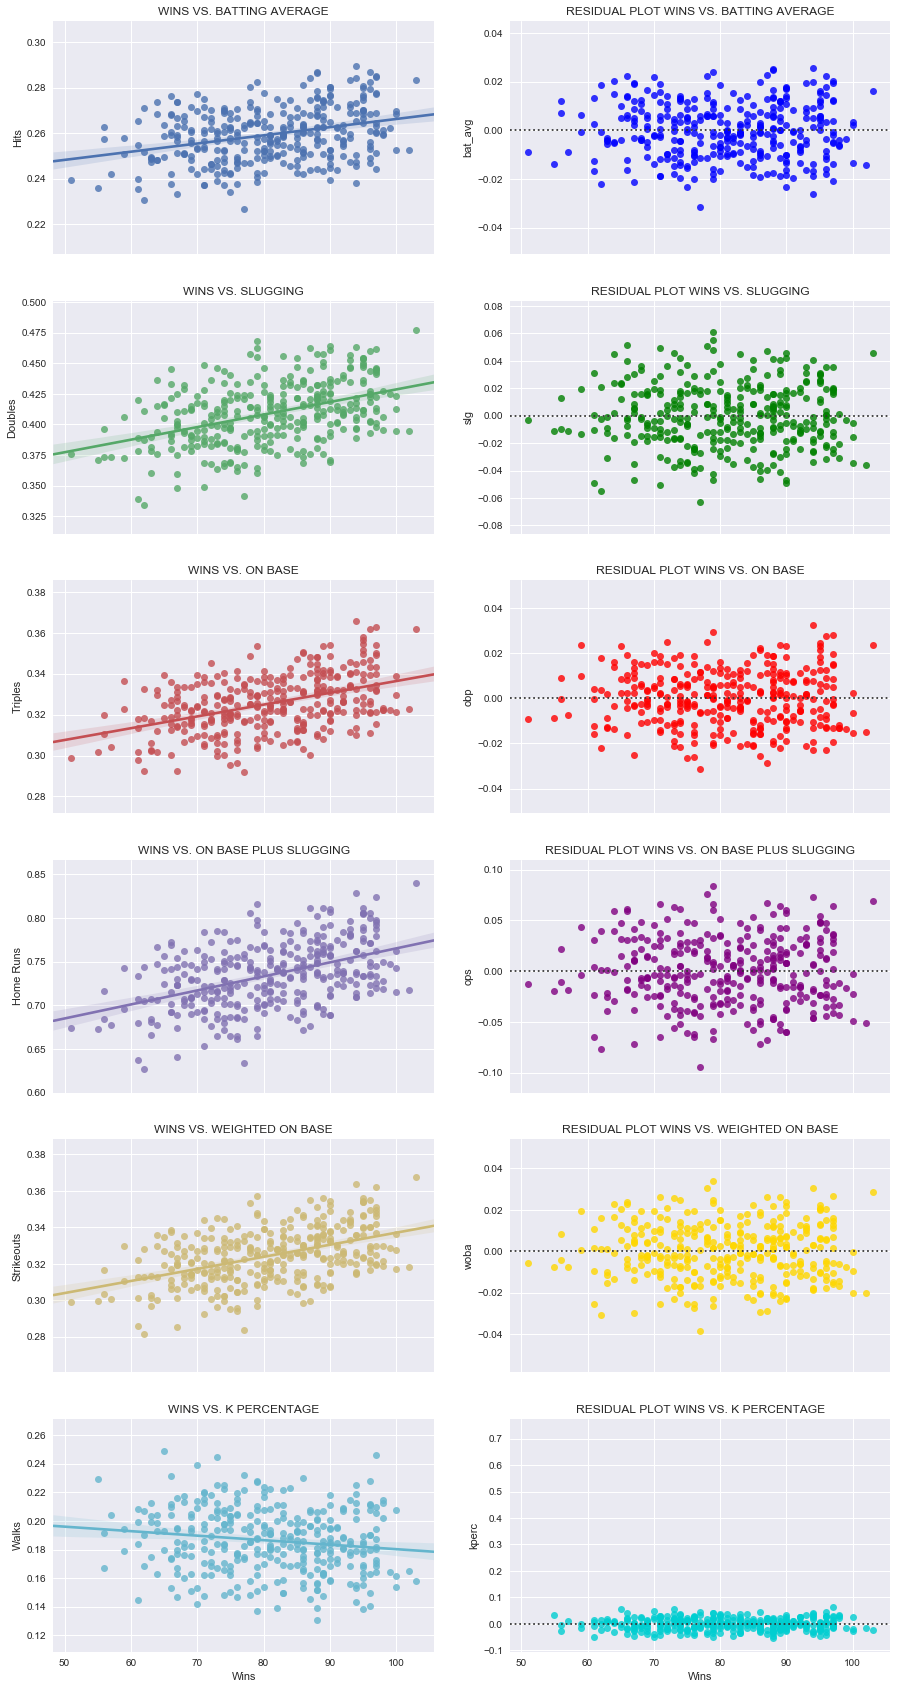

In [20]:
fig, ax = plt.subplots(6,2,figsize=(15,30), sharex = True)

sns.regplot(x='w', y='bat_avg', data=team_rb_avg, ax=ax[0,0])
ax[0,0].set_title('WINS VS. BATTING AVERAGE')
ax[0,0].set_ylabel('Hits')
ax[0,0].set_xlabel('')

sns.residplot(x='w', y='bat_avg', data=team_rb_avg, ax=ax[0,1], color = 'blue')
ax[0,1].set_title('RESIDUAL PLOT WINS VS. BATTING AVERAGE')
ax[0,1].set_xlabel('')

sns.regplot(x='w', y='slg', data=team_rb_slg, ax=ax[1,0])
ax[1,0].set_title('WINS VS. SLUGGING')
ax[1,0].set_ylabel('Doubles')
ax[1,0].set_xlabel('')

sns.residplot(x='w', y='slg', data=team_rb_slg, ax=ax[1,1], color = 'green')
ax[1,1].set_title('RESIDUAL PLOT WINS VS. SLUGGING')
ax[1,1].set_xlabel('')

sns.regplot(x='w', y='obp', data=team_rb_obp, ax=ax[2,0])
ax[2,0].set_title('WINS VS. ON BASE')
ax[2,0].set_ylabel('Triples')
ax[2,0].set_xlabel('')

sns.residplot(x='w', y='obp', data=team_rb_obp, ax=ax[2,1], color = 'red')
ax[2,1].set_title('RESIDUAL PLOT WINS VS. ON BASE')
ax[2,1].set_xlabel('')

sns.regplot(x='w', y='ops', data=team_rb_slg, ax=ax[3,0])
ax[3,0].set_title('WINS VS. ON BASE PLUS SLUGGING')
ax[3,0].set_ylabel('Home Runs')
ax[3,0].set_xlabel('')

sns.residplot(x='w', y='ops', data=team_rb_slg, ax=ax[3,1], color = 'purple')
ax[3,1].set_title('RESIDUAL PLOT WINS VS. ON BASE PLUS SLUGGING')
ax[3,1].set_xlabel('')

sns.regplot(x='w', y='woba', data=team_rb_woba, ax=ax[4,0])
ax[4,0].set_title('WINS VS. WEIGHTED ON BASE')
ax[4,0].set_ylabel('Strikeouts')
ax[4,0].set_xlabel('')

sns.residplot(x='w', y='woba', data=team_rb_woba, ax=ax[4,1], color = 'gold')
ax[4,1].set_title('RESIDUAL PLOT WINS VS. WEIGHTED ON BASE')
ax[4,1].set_xlabel('')

sns.regplot(x='w', y='kperc', data=team_rb_kperc, ax=ax[5,0])
ax[5,0].set_title('WINS VS. K PERCENTAGE')
ax[5,0].set_ylabel('Walks')
ax[5,0].set_xlabel('Wins')

sns.residplot(x='w', y='kperc', data=team_rb_kperc, ax=ax[5,1], color = 'darkturquoise')
ax[5,1].set_title('RESIDUAL PLOT WINS VS. K PERCENTAGE')
ax[5,1].set_xlabel('Wins')
None

In [33]:
team_rb.columns

Index(['year', 'league_id', 'team_id', 'franchise_id', 'div_id', 'rank', 'g',
       'ghome', 'w', 'l', 'div_win', 'wc_win', 'lg_win', 'ws_win', 'r', 'ab',
       'h', 'double', 'triple', 'hr', 'bb', 'so', 'sb', 'cs', 'hbp', 'sf',
       'ra', 'er', 'era', 'cg', 'sho', 'sv', 'ipouts', 'ha', 'hra', 'bba',
       'soa', 'e', 'dp', 'fp', 'name', 'park', 'attendance', 'bpf', 'ppf',
       'team_id_br', 'team_id_lahman45', 'team_id_retro', 'bat_avg', 'slg',
       'obp', 'ops', 'woba', 'kperc'],
      dtype='object')

In [35]:
from sklearn.linear_model import LinearRegression
ncalc = team_rb[['h', 'double', 'triple', 'hr', 'so', 'bb']]
calc = team_rb[['bat_avg', 'slg', 'obp', 'ops', 'woba', 'kperc']]
wins = team_rb['w']

In [50]:
lm = LinearRegression()
lm.fit(ncalc, wins)
pred = np.round(lm.predict(ncalc))
pred[0:5]

array([ 87.,  84.,  83.,  92.,  84.])

In [44]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 24.5164560381


In [45]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 6


In [46]:
pd.DataFrame(list(zip(ncalc.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,h,0.028177
1,double,-0.051131
2,triple,-0.006469
3,hr,0.084818
4,so,-0.004738
5,bb,0.044337


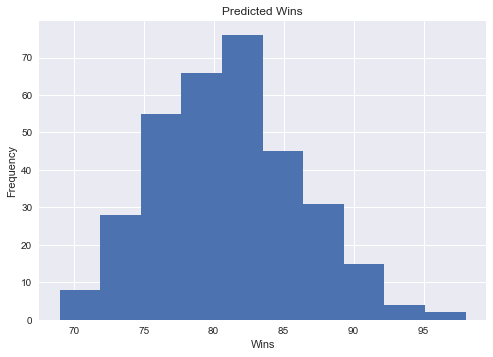

In [51]:
plt.hist(pred)
plt.title("Predicted Wins")
plt.xlabel("Wins")
plt.ylabel("Frequency")
plt.show()

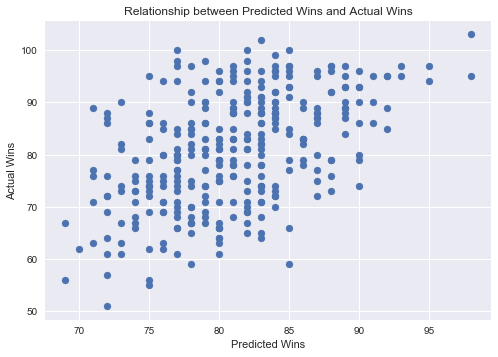

In [53]:
plt.scatter(pred, wins)
plt.xlabel("Predicted Wins")
plt.ylabel("Actual Wins")
plt.title("Relationship between Predicted Wins and Actual Wins")
plt.show()

In [58]:
print(np.sum((wins - pred) ** 2))

28529.0


In [60]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(wins, pred))

86.4515151515


In [65]:
from sklearn.cross_validation import train_test_split

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(
    ncalc, wins, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(221, 6)
(109, 6)
(221,)
(109,)


In [68]:
lm = LinearRegression()
model = lm.fit(X_train, Y_train)
pred = lm.predict(X_test)
model.score(X_test, Y_test)

0.27825734195777785

In [70]:
lm = LinearRegression()
lm.fit(calc, wins)
pred = np.round(lm.predict(calc))
pred[0:5]

array([ 86.,  85.,  83.,  92.,  82.])

In [71]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: -26.7278409091


In [72]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 6


In [73]:
pd.DataFrame(list(zip(ncalc.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,h,-2.224232e+02
1,double,2.049712e+14
2,triple,2.049712e+14
3,hr,-2.049712e+14
4,so,9.798401e+02
5,bb,-1.556097e+01


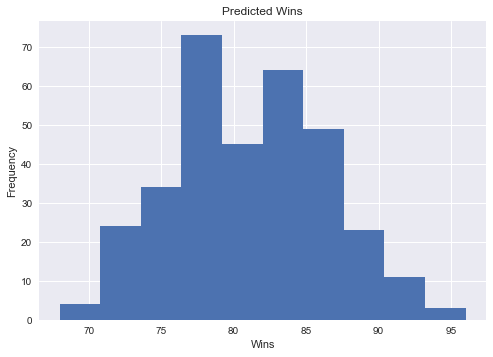

In [74]:
plt.hist(pred)
plt.title("Predicted Wins")
plt.xlabel("Wins")
plt.ylabel("Frequency")
plt.show()

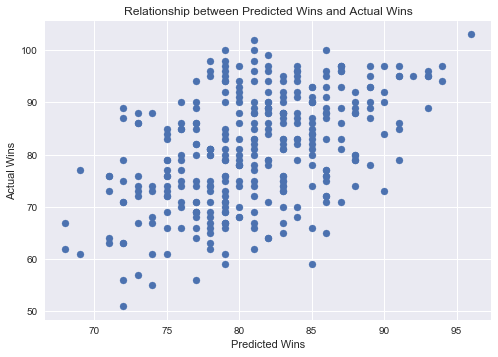

In [75]:
plt.scatter(pred, wins)
plt.xlabel("Predicted Wins")
plt.ylabel("Actual Wins")
plt.title("Relationship between Predicted Wins and Actual Wins")
plt.show()

In [76]:
print(np.sum((wins - pred) ** 2))

29008.0


In [77]:
print(mean_squared_error(wins, pred))

87.903030303


In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(
    calc, wins, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(221, 6)
(109, 6)
(221,)
(109,)


In [79]:
lm = LinearRegression()
model = lm.fit(X_train, Y_train)
pred = lm.predict(X_test)
model.score(X_test, Y_test)

0.27398677860398402